Виконав Поплавський Владислав ДА-92

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import xgboost as xgb # :)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_path = 'https://drive.google.com/file/d/1Wq6kvIzRWH7OROa4wRob3HSLZZ8EEtUg/view?usp=sharing'
test_path = 'https://drive.google.com/file/d/1Ni0e2gb3sNRxkye7UF_uIsf41_ujo0uz/view?usp=sharing'
train_url = 'https://drive.google.com/uc?id=' + train_path.split('/')[-2] +'&confirm=t'
test_url = 'https://drive.google.com/uc?id=' + test_path.split('/')[-2]
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)
dataset = [train,test]

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=np.inf)

In [ ]:
print(train.shape)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
cols_description = pd.read_csv('HomeCredit_columns_description.csv',encoding='cp1251')
cols_description[cols_description['Table']=='application_{train|test}.csv'][['Row','Description']]

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


In [ ]:
train.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [ ]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

imbalanced classes


In [ ]:
(100 * train.isnull().sum() / len(train)).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

encode categorical features with onehot encoding but before check for any of null values in objects 

In [ ]:
temp = train.select_dtypes(include='object')
(temp.isnull().sum() / len(train)).sort_values(ascending=False)

FONDKAPREMONT_MODE            0.683862
WALLSMATERIAL_MODE            0.508408
HOUSETYPE_MODE                0.501761
EMERGENCYSTATE_MODE           0.473983
OCCUPATION_TYPE               0.313455
NAME_TYPE_SUITE               0.004201
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
ORGANIZATION_TYPE             0.000000
dtype: float64

In [ ]:
cols_description.loc[cols_description['Table']=='application_{train|test}.csv'][['Row','Description']].loc[cols_description['Row'].isin(['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE'])]

,Row,Description
28,OCCUPATION_TYPE,What kind of occupation does the client have
86,FONDKAPREMONT_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
87,HOUSETYPE_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
89,WALLSMATERIAL_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
90,EMERGENCYSTATE_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"


In [ ]:
train[['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE']].sample(10)

,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE
199109,NaN,NaN,NaN,NaN,NaN
189934,reg oper account,"Stone, brick",block of flats,No,Accountants
91460,NaN,NaN,NaN,NaN,Core staff
182997,NaN,NaN,NaN,NaN,NaN
287444,NaN,NaN,NaN,NaN,NaN
274786,NaN,NaN,NaN,NaN,NaN
73452,NaN,Panel,block of flats,No,Laborers
240676,reg oper account,"Stone, brick",block of flats,No,Laborers
290538,NaN,"Stone, brick",block of flats,No,Core staff
16404,reg oper account,"Stone, brick",block of flats,No,NaN


let's check encode these columns and check how they are correlated with target

In [ ]:
df_hyp = train[['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE','TARGET']]
df_hyp = df_hyp.fillna('missing')
df_hyp_enc = pd.get_dummies(df_hyp)

In [ ]:
df_hyp_enc.head()

,TARGET,FONDKAPREMONT_MODE_missing,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_missing,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_missing,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_missing,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_missing
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_hyp_enc['random'] = np.random.randint(1, 6, df_hyp_enc.shape[0])
df_hyp_enc.corr()['TARGET'].abs().sort_values(ascending=False)

TARGET                                      1.000000
OCCUPATION_TYPE_Laborers                    0.043019
EMERGENCYSTATE_MODE_No                      0.042201
EMERGENCYSTATE_MODE_missing                 0.041392
HOUSETYPE_MODE_block of flats               0.040594
HOUSETYPE_MODE_missing                      0.039722
WALLSMATERIAL_MODE_missing                  0.039393
OCCUPATION_TYPE_missing                     0.038690
WALLSMATERIAL_MODE_Panel                    0.033119
OCCUPATION_TYPE_Drivers                     0.030303
FONDKAPREMONT_MODE_missing                  0.029476
OCCUPATION_TYPE_Low-skill Laborers          0.027591
FONDKAPREMONT_MODE_reg oper account         0.022587
OCCUPATION_TYPE_Accountants                 0.021610
OCCUPATION_TYPE_Core staff                  0.020378
OCCUPATION_TYPE_Sales staff                 0.019537
OCCUPATION_TYPE_Managers                    0.018648
OCCUPATION_TYPE_Security staff              0.014648
OCCUPATION_TYPE_High skill tech staff       0.

* it seems like nan feature may have an impact so i've decided to make missing values a unique category and leave these columns for now

* then test model with these columns removed

* or skip EDA and use XGBoost :)

In [ ]:
train[['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE','NAME_TYPE_SUITE']] =\
train[['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE','NAME_TYPE_SUITE']].fillna('missing')

In [ ]:
temp = train.select_dtypes(include='object')
(temp.isnull().sum() / len(train)).sort_values(ascending=False)

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
OCCUPATION_TYPE               0.0
WEEKDAY_APPR_PROCESS_START    0.0
ORGANIZATION_TYPE             0.0
FONDKAPREMONT_MODE            0.0
HOUSETYPE_MODE                0.0
WALLSMATERIAL_MODE            0.0
EMERGENCYSTATE_MODE           0.0
dtype: float64

In [ ]:
#same for test set
temp = test.select_dtypes(include='object')
(temp.isnull().sum() / len(test)).sort_values(ascending=False)

FONDKAPREMONT_MODE            0.672842
WALLSMATERIAL_MODE            0.490173
HOUSETYPE_MODE                0.484552
EMERGENCYSTATE_MODE           0.455625
OCCUPATION_TYPE               0.320142
NAME_TYPE_SUITE               0.018689
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
ORGANIZATION_TYPE             0.000000
dtype: float64

In [ ]:
test[['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE','NAME_TYPE_SUITE']] =\
test[['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE','NAME_TYPE_SUITE']].fillna('missing')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in train:
    if train[col].dtype == 'object':
        if train[col].nunique() <= 2:
            le.fit(train[col])
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            le_count += 1

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
print(train.shape)
print(test.shape)

(307511, 249)
(48744, 245)


In [ ]:
train_labels = train['TARGET']

train, test = train.align(test, join = 'inner', axis = 1)

train['TARGET'] = train_labels

print(train.shape)
print(test.shape)

(307511, 246)
(48744, 245)


In [ ]:
(train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
(test['DAYS_BIRTH'] / -365).describe()

count    48744.000000
mean        44.022150
std         11.851782
min         20.104110
25%         34.235616
50%         43.246575
75%         53.800000
max         69.027397
Name: DAYS_BIRTH, dtype: float64

In [ ]:
(train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

-1000 years?)

In [ ]:
(test['DAYS_EMPLOYED'] / -365).describe()

count    48744.000000
mean      -184.891415
std        395.475362
min      -1000.665753
25%          0.810959
50%          3.542466
75%          7.972603
max         47.843836
Name: DAYS_EMPLOYED, dtype: float64

the same picture. looks like some form of null values

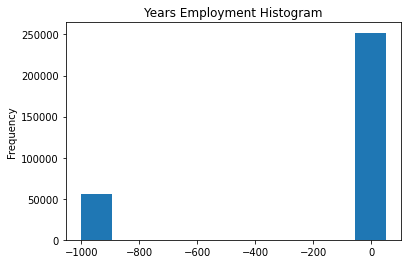

In [ ]:
(train['DAYS_EMPLOYED'] / -365).plot.hist(title = 'Years Employment Histogram');

In [ ]:
model = xgb.XGBClassifier()
model.fit(train.drop(columns=['TARGET','SK_ID_CURR']),train['TARGET'])

c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
test_ids = test['SK_ID_CURR']
#del test['SK_ID_CURR']
#predicted = model.predict_proba(test)
#subm = pd.DataFrame({'SK_ID_CURR':test_ids,'TARGET':predicted[:,1]})
#subm.to_csv('submission.csv',index=False)

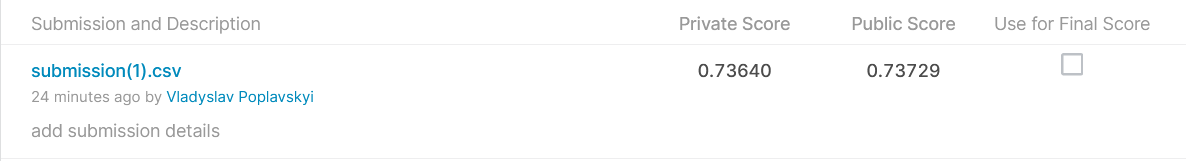

oh sorry let's continue)

In [ ]:
(test['DAYS_EMPLOYED']).describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print('non anomaly default rate',non_anom['TARGET'].mean())
print('anomaly default rate',anom['TARGET'].mean())

non anomaly default rate 0.0865997453765215
anomaly default rate 0.05399646043269404


anomalies have lower default rate

<AxesSubplot:ylabel='Frequency'>

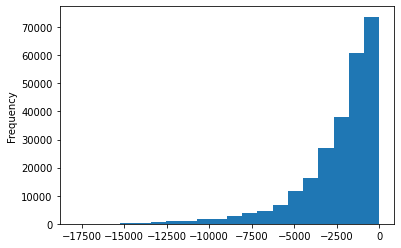

In [ ]:
train['DAYS_EMPLOYED_ANOMALY'] = train['DAYS_EMPLOYED'] == 365243
train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
train['DAYS_EMPLOYED'].plot.hist(bins = 20)

much better distribution

In [ ]:
test['DAYS_EMPLOYED_ANOMALY'] = test['DAYS_EMPLOYED'] == 365243
test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

In [ ]:
days_features = []
for col in train.columns:
  if 'DAY' in col:
    print(col)
    days_features.append(col)

DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_DAY
WEEKDAY_APPR_PROCESS_START_FRIDAY
WEEKDAY_APPR_PROCESS_START_MONDAY
WEEKDAY_APPR_PROCESS_START_SATURDAY
WEEKDAY_APPR_PROCESS_START_SUNDAY
WEEKDAY_APPR_PROCESS_START_THURSDAY
WEEKDAY_APPR_PROCESS_START_TUESDAY
WEEKDAY_APPR_PROCESS_START_WEDNESDAY
DAYS_EMPLOYED_ANOMALY


In [ ]:
train[days_features]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,DAYS_EMPLOYED_ANOMALY
0,-9461,-637.0,-3648.0,-2120,-1134.0,0.0,0,0,0,0,0,0,1,False
1,-16765,-1188.0,-1186.0,-291,-828.0,0.0,0,1,0,0,0,0,0,False
2,-19046,-225.0,-4260.0,-2531,-815.0,0.0,0,1,0,0,0,0,0,False
3,-19005,-3039.0,-9833.0,-2437,-617.0,NaN,0,0,0,0,0,0,1,False
4,-19932,-3038.0,-4311.0,-3458,-1106.0,0.0,0,0,0,0,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-9327,-236.0,-8456.0,-1982,-273.0,NaN,0,0,0,0,1,0,0,False
307507,-20775,NaN,-4388.0,-4090,0.0,NaN,0,1,0,0,0,0,0,True
307508,-14966,-7921.0,-6737.0,-5150,-1909.0,0.0,0,0,0,0,1,0,0,False
307509,-11961,-4786.0,-2562.0,-931,-322.0,0.0,0,0,0,0,0,0,1,False


In [ ]:
cols_description[cols_description['Row'].isin(days_features)][['Row','Description']]

,Row,Description
17,DAYS_BIRTH,Client's age in days at the time of application
18,DAYS_EMPLOYED,How many days before the application the person started current employment
19,DAYS_REGISTRATION,How many days before the application did client change his registration
20,DAYS_ID_PUBLISH,How many days before the application did client change the identity document with which he applied for the loan
95,DAYS_LAST_PHONE_CHANGE,How many days before application did client change phone
117,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)


In [ ]:
neg_day_features = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
(train[neg_day_features]/-365).describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,252137.000000,307511.000000,307511.000000,307510.000000
mean,43.936973,6.531971,13.660604,8.203294,2.637969
std,11.956133,6.406466,9.651743,4.135481,2.265229
min,20.517808,-0.000000,-0.000000,-0.000000,-0.000000
25%,34.008219,2.101370,5.506849,4.712329,0.750685
50%,43.150685,4.515068,12.339726,8.915068,2.073973
75%,53.923288,8.698630,20.491781,11.778082,4.301370
max,69.120548,49.073973,67.594521,19.717808,11.758904


looks like no outliers for now

In [ ]:
train[neg_day_features] = train[neg_day_features]/-365
test[neg_day_features] = test[neg_day_features]/-365

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Density'>

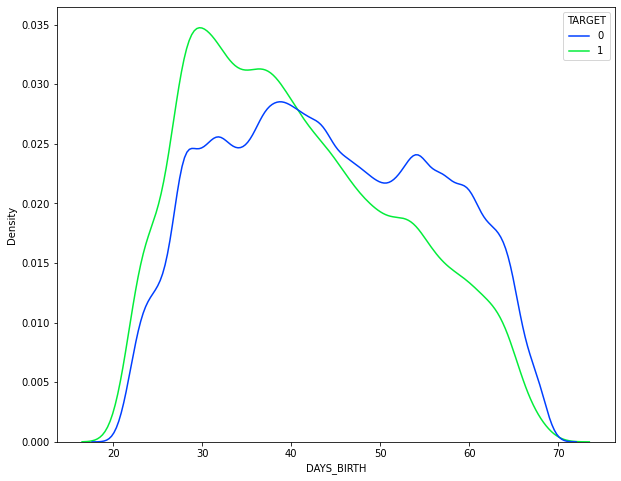

In [ ]:
import seaborn as sns
plt.style.use('seaborn-bright')
plt.figure(figsize = (10, 8))
sns.kdeplot(data=train,x='DAYS_BIRTH',hue='TARGET',common_norm=False)

In [ ]:
neg_day_features

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

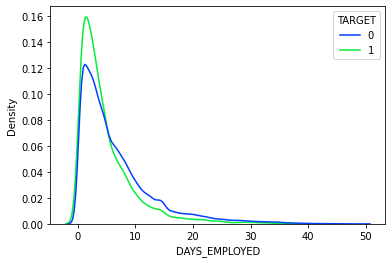

In [ ]:
sns.kdeplot(data=train,x='DAYS_EMPLOYED',hue='TARGET',common_norm=False)

In [ ]:
train.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True)
test.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION',
 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True)


In [ ]:
age_df = train[['YEARS_BIRTH','TARGET']]
age_df['YEARS_BINNED'] = pd.cut(age_df['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

C:\Users\vladp\AppData\Local\Temp/ipykernel_17604/1319850466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['YEARS_BINNED'] = pd.cut(age_df['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


In [ ]:
age_df.head()

,YEARS_BIRTH,TARGET,YEARS_BINNED
0,25.920548,1,"(25.0, 30.0]"
1,45.931507,0,"(45.0, 50.0]"
2,52.180822,0,"(50.0, 55.0]"
3,52.068493,0,"(50.0, 55.0]"
4,54.608219,0,"(50.0, 55.0]"


In [ ]:
age_groups = age_df.groupby('YEARS_BINNED').mean()
age_groups

,YEARS_BIRTH,TARGET
YEARS_BINNED,,
"(20.0, 25.0]",23.377522,0.123036
"(25.0, 30.0]",27.822518,0.111436
"(30.0, 35.0]",32.479037,0.102814
"(35.0, 40.0]",37.555913,0.089414
"(40.0, 45.0]",42.459346,0.078491
"(45.0, 50.0]",47.462741,0.074171
"(50.0, 55.0]",52.593136,0.066968
"(55.0, 60.0]",57.491131,0.055314
"(60.0, 65.0]",62.412459,0.052737


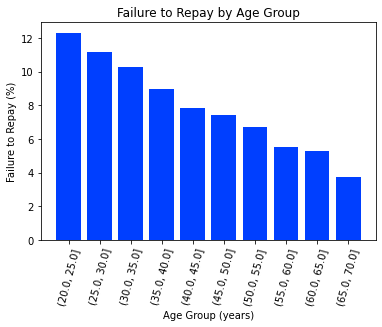

In [ ]:
plt.bar(age_groups.index.astype(str),age_groups['TARGET']*100)

plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [ ]:
corrs = train.corr()['TARGET']

In [ ]:
corrs.abs().sort_values(ascending=False)

TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
YEARS_BIRTH                                          0.078239
YEARS_EMPLOYED                                       0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
YEARS_LAST_PHONE_CHANGE                              0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
YEARS_ID_PUBLISH                                     0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INC

In [ ]:
cols_description[cols_description['Row'].isin(corrs.abs().sort_values(ascending=False).index[:20])][['Row','Description']]

,Row,Description
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
23,FLAG_EMP_PHONE,"Did client provide work phone (1=YES, 0=NO)"
30,REGION_RATING_CLIENT,"Our rating of the region where client lives (1,2,3)"
31,REGION_RATING_CLIENT_W_CITY,"Our rating of the region where client lives with taking city into account (1,2,3)"
37,REG_CITY_NOT_LIVE_CITY,"Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)"
38,REG_CITY_NOT_WORK_CITY,"Flag if client's permanent address does not match work address (1=different, 0=same, at city level)"
41,EXT_SOURCE_1,Normalized score from external data source
42,EXT_SOURCE_2,Normalized score from external data source
43,EXT_SOURCE_3,Normalized score from external data source


In [ ]:
del train['SK_ID_CURR']
train_targets = train['TARGET']
del train['TARGET']

In [ ]:
print(train.shape)
print(test.shape)

(307511, 245)
(48744, 245)


array([[<AxesSubplot:title={'center':'NAME_CONTRACT_TYPE'}>,
        <AxesSubplot:title={'center':'FLAG_OWN_CAR'}>,
        <AxesSubplot:title={'center':'FLAG_OWN_REALTY'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'YEARS_BIRTH'}>,
        <AxesSubplot:title={'center':'YEARS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'YEARS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'YEARS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>],
       [<AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:tit

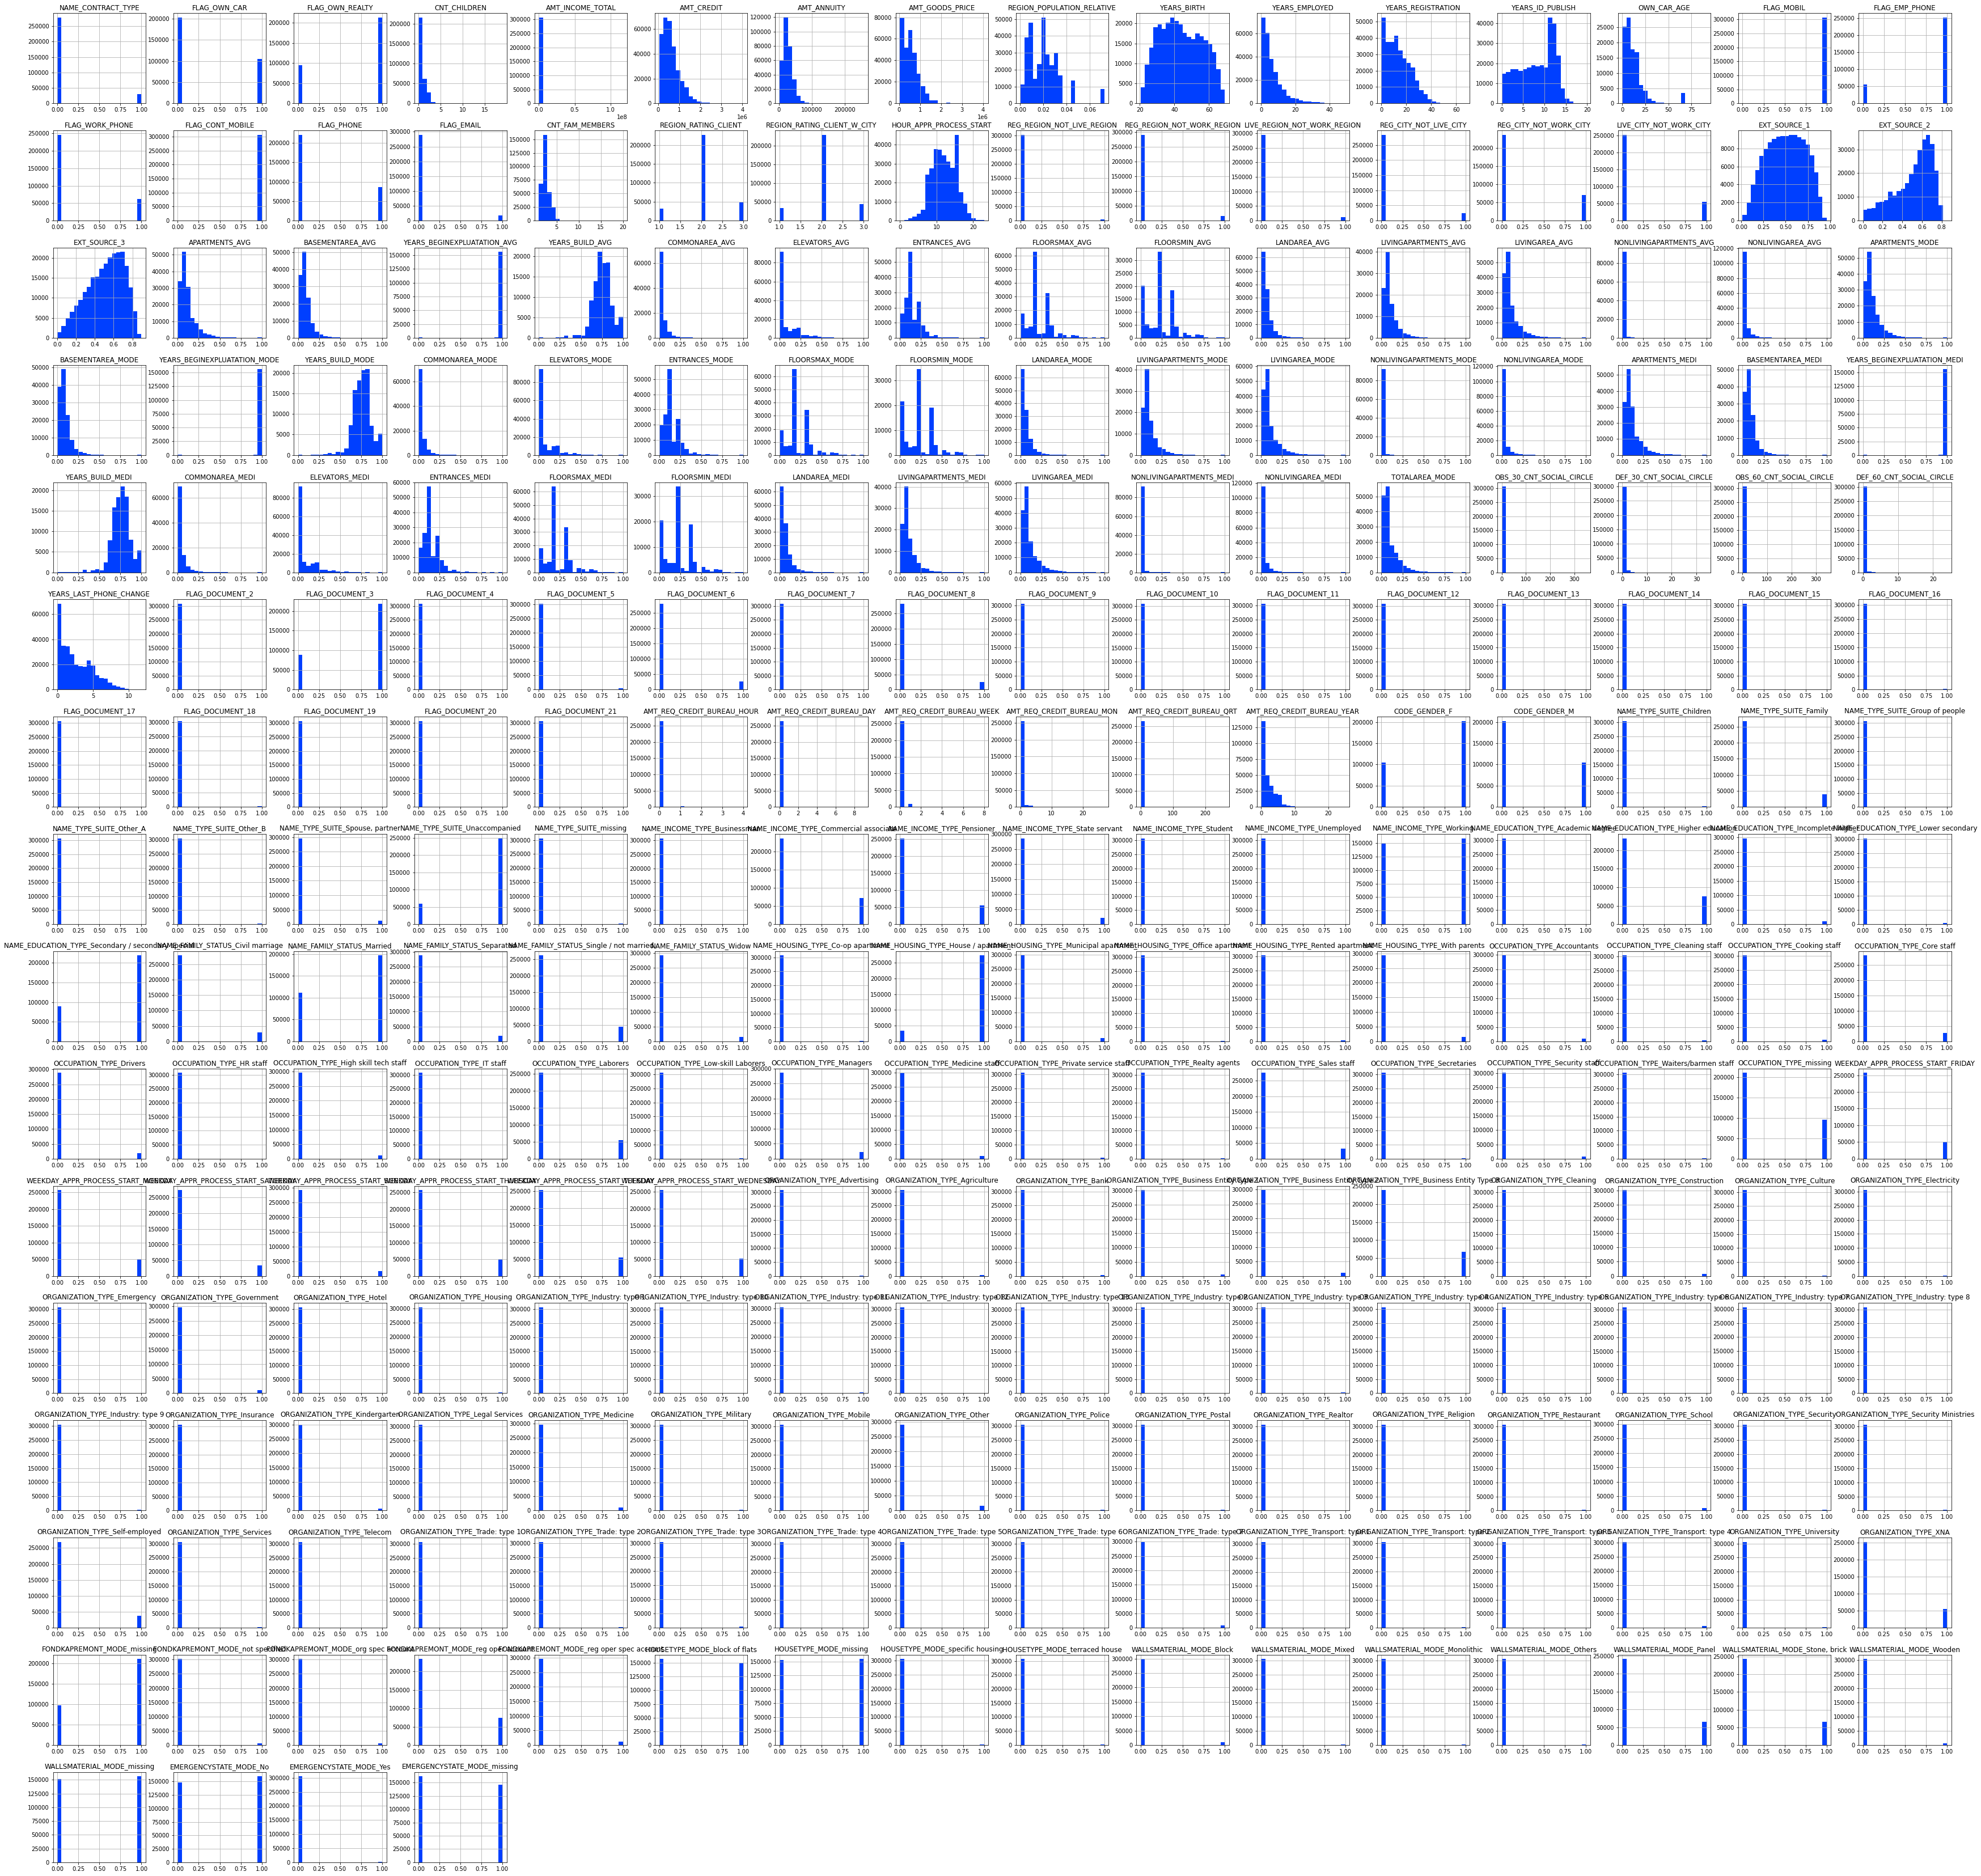

In [ ]:
train.hist(bins=20, figsize=(60, 60))

In [ ]:
train.describe()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_missing,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_missing,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,

In [ ]:
cols_description[cols_description['Row'].isin(['AMT_INCOME_TOTAL',])]

,Unnamed: 0,Table,Row,Description,Special
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN


In [ ]:
train['AMT_INCOME_TOTAL'].sample(20)

246938     90000.0
160740     67500.0
167016     72000.0
205403     94500.0
2968      270000.0
231915     99000.0
159       225000.0
247820    630000.0
275126     90000.0
98498      54000.0
91861     112500.0
215781    112500.0
69799     315000.0
147340     31500.0
89646     112500.0
260763    112500.0
116368    292500.0
54648     162000.0
135523     90000.0
1674      378000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
(100 * train.isnull().sum() / len(train)).sort_values(ascending=False)

COMMONAREA_MODE                                      69.872297
COMMONAREA_AVG                                       69.872297
COMMONAREA_MEDI                                      69.872297
NONLIVINGAPARTMENTS_AVG                              69.432963
NONLIVINGAPARTMENTS_MEDI                             69.432963
NONLIVINGAPARTMENTS_MODE                             69.432963
LIVINGAPARTMENTS_AVG                                 68.354953
LIVINGAPARTMENTS_MODE                                68.354953
LIVINGAPARTMENTS_MEDI                                68.354953
FLOORSMIN_AVG                                        67.848630
FLOORSMIN_MEDI                                       67.848630
FLOORSMIN_MODE                                       67.848630
YEARS_BUILD_MODE                                     66.497784
YEARS_BUILD_AVG                                      66.497784
YEARS_BUILD_MEDI                                     66.497784
OWN_CAR_AGE                                          65

In [ ]:
model = xgb.XGBClassifier()
model.fit(train,train_targets)
predicted = model.predict_proba(test)
subm = pd.DataFrame({'SK_ID_CURR':test_ids,'TARGET':predicted[:,1]})
subm.to_csv('submission_xgb_no_polynomial_features_no_feature_engineering_no_hyperparameter_search.csv',index=False)

c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128,input_shape=(200,),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Dense(64,activation='relu'),
       # tf.keras.layers.Dense(64,activation='sigmoid'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['AUC',
])

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
train_temp = imputer.fit_transform(train)
trainN = pd.DataFrame(train_temp,columns=train.columns)
test_temp = imputer.transform(test)
testN = pd.DataFrame(test_temp,columns=test.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(trainN, train_targets, test_size=0.15, random_state=42)

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(trainN)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=8, min_lr=0.001)
model.fit(x=transformer.transform(trainN),y=train_targets,batch_size = 2048,epochs = 300,callbacks=[reduce_lr]#validation_split = 0.15
)

Epoch 1/300
151/151 [==============================] - 2s 15ms/step - loss: 0.2650 - auc: 0.6854 - lr: 0.0300
Epoch 2/300
151/151 [==============================] - 2s 13ms/step - loss: 0.2640 - auc: 0.6924 - lr: 0.0300
Epoch 3/300
151/151 [==============================] - 2s 14ms/step - loss: 0.2637 - auc: 0.6946 - lr: 0.0300
Epoch 4/300
151/151 [==============================] - 2s 14ms/step - loss: 0.2647 - auc: 0.6882 - lr: 0.0300
Epoch 5/300
151/151 [==============================] - 2s 14ms/step - loss: 0.2642 - auc: 0.6916 - lr: 0.0300
Epoch 6/300
151/151 [==============================] - 2s 14ms/step - loss: 0.2638 - auc: 0.6936 - lr: 0.0300
Epoch 7/300
151/151 [==============================] - 2s 15ms/step - loss: 0.2642 - auc: 0.6915 - lr: 0.0300
Epoch 8/300
151/151 [==============================] - 2s 14ms/step - loss: 0.2640 - auc: 0.6916 - lr: 0.0300
Epoch 9/300
151/151 [==============================] - 2s 14ms/step - loss: 0.2642 - auc: 0.6916 - lr: 0.0300
Epoch 10/3

KeyboardInterrupt: 

seems has no chance to compete with xgb

In [ ]:
print(trainN.shape)
train_targets.shape

In [ ]:
train.dtypes.value_counts()

uint8      137
float64     68
int64       36
int32        3
bool         1
dtype: int64

In [ ]:
predicted = model.predict(transformer.transform(testN))

11

NAME_CONTRACT_TYPE                                        0
FLAG_OWN_CAR                                              0
FLAG_OWN_REALTY                                           0
CNT_CHILDREN                                              0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
AMT_ANNUITY                                              12
AMT_GOODS_PRICE                                         278
REGION_POPULATION_RELATIVE                                0
YEARS_BIRTH                                               0
YEARS_EMPLOYED                                        55374
YEARS_REGISTRATION                                        0
YEARS_ID_PUBLISH                                          0
OWN_CAR_AGE                                          202929
FLAG_MOBIL                                                0
FLAG_EMP_PHONE                                            0
FLAG_WORK_PHONE                         

In [ ]:
nulls = (train.isnull().sum() / len(train))
nulls_cols = list(nulls[nulls>0.2].sort_values(ascending=False).index)

In [ ]:
train.drop(columns = nulls_cols,inplace = True)
test.drop(columns = nulls_cols,inplace = True)

In [ ]:
print(train.shape)
print(test.shape)

(307511, 200)
(48744, 200)


In [ ]:
nulls = (train.isnull().sum() / len(train))
cols_to_impute = list(nulls[nulls>0].sort_values(ascending=False).index)

In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer()
train[cols_to_impute] = knn.fit_transform(train[cols_to_impute])
test[cols_to_impute ] = knn.transform(test[cols_to_impute])

In [ ]:
(train.isnull().sum() / len(test)).sort_values(ascending=False)

NAME_CONTRACT_TYPE                                   0.0
ORGANIZATION_TYPE_Industry: type 11                  0.0
ORGANIZATION_TYPE_Cleaning                           0.0
ORGANIZATION_TYPE_Construction                       0.0
ORGANIZATION_TYPE_Culture                            0.0
ORGANIZATION_TYPE_Electricity                        0.0
ORGANIZATION_TYPE_Emergency                          0.0
ORGANIZATION_TYPE_Government                         0.0
ORGANIZATION_TYPE_Hotel                              0.0
ORGANIZATION_TYPE_Housing                            0.0
ORGANIZATION_TYPE_Industry: type 1                   0.0
ORGANIZATION_TYPE_Industry: type 10                  0.0
ORGANIZATION_TYPE_Industry: type 12                  0.0
FLAG_OWN_CAR                                         0.0
ORGANIZATION_TYPE_Industry: type 13                  0.0
ORGANIZATION_TYPE_Industry: type 2                   0.0
ORGANIZATION_TYPE_Industry: type 3                   0.0
ORGANIZATION_TYPE_Industry: typ

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
print(train.shape)
print(test.shape)

(307511, 200)
(48744, 200)


In [ ]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
from sklearn.preprocessing import normalize

train_normed = normalize(train,axis=0)
trainN = pd.DataFrame(train_normed,columns= train.columns)
trainN.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_missing,DAYS_EMPLOYED_ANOMALY
0,0.000000,0.000000,0.002165,0.0,0.001255,0.001016,0.001449,0.000970,0.001354,0.001027,...,0.0,0.0,0.0,0.003928,0.0,0.000000,0.002504,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,0.001673,0.003232,0.002094,0.003120,0.000255,0.001819,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.002504,0.0,0.000000,0.0
2,0.005844,0.003092,0.002165,0.0,0.000418,0.000337,0.000396,0.000373,0.000723,0.002067,...,0.0,0.0,0.0,0.000000,0.0,0.002529,0.000000,0.0,0.002619,0.0
3,0.000000,0.000000,0.002165,0.0,0.000836,0.000781,0.001742,0.000821,0.000578,0.002062,...,0.0,0.0,0.0,0.000000,0.0,0.002529,0.000000,0.0,0.002619,0.0
4,0.000000,0.000000,0.002165,0.0,0.000753,0.001282,0.001283,0.001417,0.002065,0.002163,...,0.0,0.0,0.0,0.000000,0.0,0.002529,0.000000,0.0,0.002619,0.0


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=8, min_lr=0.001)
model.fit(x=train,y=train_targets,batch_size = 1024,epochs = 300,callbacks=[reduce_lr],validation_split = 0.15
)

Epoch 1/300
256/256 [==============================] - 4s 8ms/step - loss: 0.2893 - auc: 0.5564 - val_loss: 0.2745 - val_auc: 0.5839 - lr: 0.0200
Epoch 2/300
256/256 [==============================] - 1s 6ms/step - loss: 0.2794 - auc: 0.5686 - val_loss: 0.2740 - val_auc: 0.5853 - lr: 0.0200
Epoch 3/300
256/256 [==============================] - 1s 6ms/step - loss: 0.2796 - auc: 0.5679 - val_loss: 0.2762 - val_auc: 0.5587 - lr: 0.0200
Epoch 4/300
256/256 [==============================] - 1s 6ms/step - loss: 0.2793 - auc: 0.5705 - val_loss: 0.2739 - val_auc: 0.5823 - lr: 0.0200
Epoch 5/300
256/256 [==============================] - 2s 6ms/step - loss: 0.2792 - auc: 0.5705 - val_loss: 0.2759 - val_auc: 0.5850 - lr: 0.0200
Epoch 6/300
256/256 [==============================] - 2s 6ms/step - loss: 0.2791 - auc: 0.5715 - val_loss: 0.2735 - val_auc: 0.5864 - lr: 0.0200
Epoch 7/300
256/256 [==============================] - 1s 6ms/step - loss: 0.2787 - auc: 0.5753 - val_loss: 0.2753 - val_auc

KeyboardInterrupt: 

In [ ]:
int_cols = list(train.dtypes[train.dtypes!='float64'].index)

In [ ]:
for col in int_cols:
    train[col]=train[col].astype(float)
    test[col]=test[col].astype(float)

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = xgb.XGBClassifier()
scores = cross_val_score(classifier,train,train_targets,scoring='roc_auc',cv=5)
classifier.fit(train,train_targets)
#test_ids = test['SK_ID_CURR']
#del test['SK_ID_CURR']
predicted = classifier.predict_proba(test)
subm = pd.DataFrame({'SK_ID_CURR':test_ids,'TARGET':predicted[:,1]})
subm.to_csv('submission_xgb_imputed_no_feature_engineering.csv',index=False)

In [ ]:
train['target']=train_targets
corrs = train.corr()['target'].abs().sort_values(ascending=False)

In [ ]:
corrs

target                                1.000000
EXT_SOURCE_3                          0.164108
EXT_SOURCE_2                          0.160278
YEARS_BIRTH                           0.078239
YEARS_EMPLOYED                        0.074567
                                        ...   
NAME_HOUSING_TYPE_Co-op apartment     0.000312
ORGANIZATION_TYPE_Legal Services      0.000236
FLAG_DOCUMENT_20                      0.000215
ORGANIZATION_TYPE_Advertising         0.000117
ORGANIZATION_TYPE_Industry: type 7    0.000094
Name: target, Length: 201, dtype: float64

In [ ]:
train.columns.values

array(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YEARS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_

In [ ]:
train[(train['NAME_INCOME_TYPE_Working']==1)][['NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Higher education','target']].mean()

NAME_INCOME_TYPE_Working                1.000000
NAME_EDUCATION_TYPE_Higher education    0.212642
target                                  0.095885
dtype: float64

In [ ]:
pol_cols = list(corrs.index[:20])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial = train[pol_cols]
poly = PolynomialFeatures(3)
pol_temp = poly.fit_transform(polynomial)
polynomialN =pd.DataFrame(pol_temp,columns=poly.get_feature_names(polynomial.columns))
polynomialN['target'] = train_targets
polynomialN.head()

c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,target,EXT_SOURCE_3,EXT_SOURCE_2,YEARS_BIRTH,YEARS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,...,ORGANIZATION_TYPE_XNA^3,ORGANIZATION_TYPE_XNA^2 FLAG_EMP_PHONE,ORGANIZATION_TYPE_XNA^2 REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE_XNA FLAG_EMP_PHONE^2,ORGANIZATION_TYPE_XNA FLAG_EMP_PHONE REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE_XNA REG_CITY_NOT_LIVE_CITY^2,FLAG_EMP_PHONE^3,FLAG_EMP_PHONE^2 REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE REG_CITY_NOT_LIVE_CITY^2,REG_CITY_NOT_LIVE_CITY^3
0,1.0,1,0.139376,0.262949,25.920548,1.745205,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0,0.641353,0.622246,45.931507,3.254795,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0,0.729567,0.555912,52.180822,0.616438,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0,0.311949,0.650442,52.068493,8.326027,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0,0.577869,0.322738,54.608219,8.323288,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
corrs = polynomialN.corr()['target'].abs().sort_values(ascending=False)

In [ ]:
cols_to_add = list(corrs[~corrs.index.str.contains('target')][:60].index)

In [ ]:
del train['target']
train[cols_to_add] = polynomialN[cols_to_add]

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = xgb.XGBClassifier()
scores = cross_val_score(classifier,train,train_targets,scoring='roc_auc',cv=5)
classifier.fit(train,train_targets)
#test_ids = test['SK_ID_CURR']
#del test['SK_ID_CURR']
predicted = classifier.predict_proba(test)
subm = pd.DataFrame({'SK_ID_CURR':test_ids,'TARGET':predicted[:,1]})
subm.to_csv('submission_xgb_imputed_no_feature_engineering.csv',index=False)
scores

c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:50:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:53:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:56:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.74681523, 0.74289861, 0.73764544, 0.74493193, 0.74609069])

wow a bit better

In [ ]:
train.to_csv('train_pol.csv',index=False)

In [ ]:
#pol_cols.remove('target')
polynomial = test[pol_cols]
poly = PolynomialFeatures(3)
pol_temp = poly.fit_transform(polynomial)
polynomialN =pd.DataFrame(pol_temp,columns=poly.get_feature_names(polynomial.columns))
test[cols_to_add] = polynomialN[cols_to_add]
#polynomialN['target'] = train_targets
#polynomialN.head()

c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier = xgb.XGBClassifier()
#scores = cross_val_score(classifier,train,train_targets,scoring='roc_auc',cv=5)
classifier.fit(train,train_targets)
predicted = classifier.predict_proba(test)
subm = pd.DataFrame({'SK_ID_CURR':test_ids,'TARGET':predicted[:,1]})
subm.to_csv('submission_xgb_imputed_with_polynomial_features.csv',index=False)

c:\users\vladp\pycharmprojects\test\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


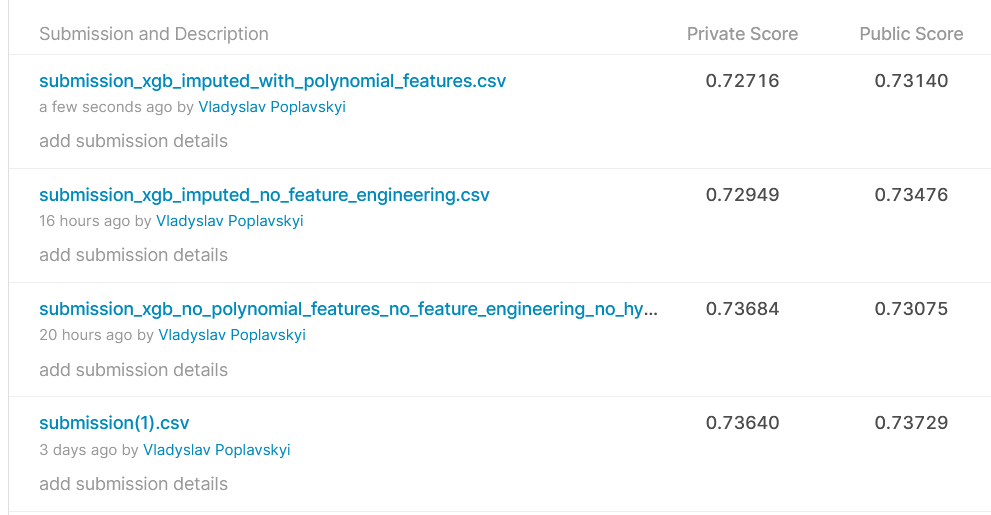